<a href="https://colab.research.google.com/github/szmtz/ds/blob/main/leaningTower1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leaning Tower of Data Analysis Example

### Learning Objectives


* Analyze data using ChatGPT, identifying trends, detecting outliers, and exploring correlations.
* Handle missing values, summarize datasets, and perform part-to-whole analysis.
* Build machine learning models for classification and assess performance.
* Create visually appealing data visualizations with proper color, font, and caption design.
* Apply the "Leaning Tower of Data Analysis" framework to real-world datasets.


### Upload, describe and clean the dataset

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly


In [2]:
data = pd.read_csv('Allan_stores_weekly_sales.csv')
print(data.head())

   Store        Date          Holiday  Weekly_Sales  Store Area  \
0      1  2022-02-06              NaN   11505836.30       60000   
1      1  2022-02-13  Presidents' Day   11493702.08       60000   
2      1  2022-02-20              NaN   11283777.19       60000   
3      1  2022-02-27              NaN    9868093.13       60000   
4      1  2022-03-06              NaN   10883646.76       60000   

   Items Available  Avg Daily Customer Count      Location  
0            55175                     11027  New York, NY  
1            58394                     11648  New York, NY  
2            57172                     11196  New York, NY  
3            56427                      9657  New York, NY  
4            53954                     10197  New York, NY  


In [3]:
# PROMPT : Describe the dataset, explain the columns, data types and provide a snapshot of the first few records.
# Code:
# Display dataset information: columns, data types, and a snapshot of the first few records
data_info = data.dtypes
data_head = data.head()

display(data_info, data_head)

,0
Store,int64
Date,object
Holiday,object
Weekly_Sales,float64
Store Area,int64
Items Available,int64
Avg Daily Customer Count,int64
Location,object


,Store,Date,Holiday,Weekly_Sales,Store Area,Items Available,Avg Daily Customer Count,Location
0,1,2022-02-06,NaN,11505836.30,60000,55175,11027,"New York, NY"
1,1,2022-02-13,Presidents' Day,11493702.08,60000,58394,11648,"New York, NY"
2,1,2022-02-20,NaN,11283777.19,60000,57172,11196,"New York, NY"
3,1,2022-02-27,NaN,9868093.13,60000,56427,9657,"New York, NY"
4,1,2022-03-06,NaN,10883646.76,60000,53954,10197,"New York, NY"


In [4]:
# PROMPT : What is the time range of the date column?

# CODE:
# Checking the time range of the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])  # Convert to datetime format if not already
date_range = data['Date'].min(), data['Date'].max()

date_range


(Timestamp('2022-02-06 00:00:00'), Timestamp('2024-01-28 00:00:00'))

In [5]:
# PROMPT : How many stores does Allan have?

# CODE:
# Get the number of unique stores and their locations
unique_stores = data['Store'].nunique()
store_locations = data[['Store', 'Location']].drop_duplicates().sort_values(by='Store')

unique_stores, store_locations


(9,
      Store          Location
 0        1      New York, NY
 104      2   Los Angeles, CA
 208      3       Chicago, IL
 312      4       Houston, TX
 416      5       Phoenix, AZ
 520      6  Philadelphia, PA
 624      7   San Antonio, TX
 728      8     San Diego, CA
 832      9        Dallas, TX)

In [6]:
# PROMPT : Fill in the missing values in the holiday column with "non-holiday" and show the first 10 rows of the updated dataset.

# CODE:

# Fill missing values in the 'Holiday' column with "non-holiday"
data['Holiday'].fillna("non-holiday", inplace=True)

# Display the first 10 rows of the updated dataset
data_head_10 = data.head(10)
display(data_head_10)


<ipython-input-6-c4a9dcbf04fe>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Holiday'].fillna("non-holiday", inplace=True)


,Store,Date,Holiday,Weekly_Sales,Store Area,Items Available,Avg Daily Customer Count,Location
0,1,2022-02-06,non-holiday,11505836.30,60000,55175,11027,"New York, NY"
1,1,2022-02-13,Presidents' Day,11493702.08,60000,58394,11648,"New York, NY"
2,1,2022-02-20,non-holiday,11283777.19,60000,57172,11196,"New York, NY"
3,1,2022-02-27,non-holiday,9868093.13,60000,56427,9657,"New York, NY"
4,1,2022-03-06,non-holiday,10883646.76,60000,53954,10197,"New York, NY"
5,1,2022-03-13,non-holiday,10076791.13,60000,53954,9441,"New York, NY"
6,1,2022-03-20,non-holiday,10307610.53,60000,53407,9556,"New York, NY"
7,1,2022-03-27,non-holiday,9831009.44,60000,57922,9880,"New York, NY"
8,1,2022-04-03,non-holiday,11164777.96,60000,56440,10940,"New York, NY"
9,1,2022-04-10,non-holiday,10817929.71,60000,57038,10710,"New York, NY"


### STATISTICAL SUMMARY
Mean, Median, Quantiles, etc.

Review
* Numerical Data : How much? or How many?
* Categorical Data : Category (group) to which things belong

In [7]:
'''
PROMPT: Generate a statistical summary of the numerical columns in the dataset,
including count, minimum, maximum, mean, median and standard deviation.
Save the results in a table.
'''

# CODE :
# Generate a statistical summary for numerical columns
summary_stats = data.describe().T  # Transpose for easier reading

# Add median to the summary statistics
summary_stats['median'] = data.median(numeric_only=True)

# Reorder and select specific columns for display
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '50%', 'max']]
summary_stats.columns = ['count', 'mean', 'std_dev', 'min', 'median', 'max']

display(summary_stats)

,count,mean,std_dev,min,median,max
Store,936.0,5.0,2.583369,1.0,5.0,9.0
Date,936,2023-02-01 12:00:00,NaN,2022-02-06 00:00:00,2023-02-01 12:00:00,2024-01-28 00:00:00
Weekly_Sales,936.0,8199099.544357,5146693.505488,1882503.21,6950891.375845,30012754.619206
Store Area,936.0,43274.777778,6006.705267,40000.0,40917.0,60000.0
Items Available,936.0,40262.32265,5667.543071,35430.0,38526.0,58596.0
Avg Daily Customer Count,936.0,7850.067308,5111.160329,1634.0,6877.5,28429.0


In [8]:
# PROMPT : Provide value counts for unique values in the categorical columns

# CODE:

# Calculate value counts for unique values in each categorical column
holiday_counts = data['Holiday'].value_counts()
location_counts = data['Location'].value_counts()

display(holiday_counts)
display(location_counts)


,count
Holiday,
non-holiday,738
Presidents' Day,18
Memorial Day,18
Independence Day,18
Labor Day,18
Columbus Day,18
Veterans Day,18
"Thanksgiving Day, Black Friday",18
Cyber Monday,18


,count
Location,
"New York, NY",104
"Los Angeles, CA",104
"Chicago, IL",104
"Houston, TX",104
"Phoenix, AZ",104
"Philadelphia, PA",104
"San Antonio, TX",104
"San Diego, CA",104
"Dallas, TX",104


### Distribution and Comparison

,Store,Store Area
0,1,60000
104,2,42676
208,3,40089
312,4,42896
416,5,40000
520,6,42028
624,7,40504
728,8,40917
832,9,40363


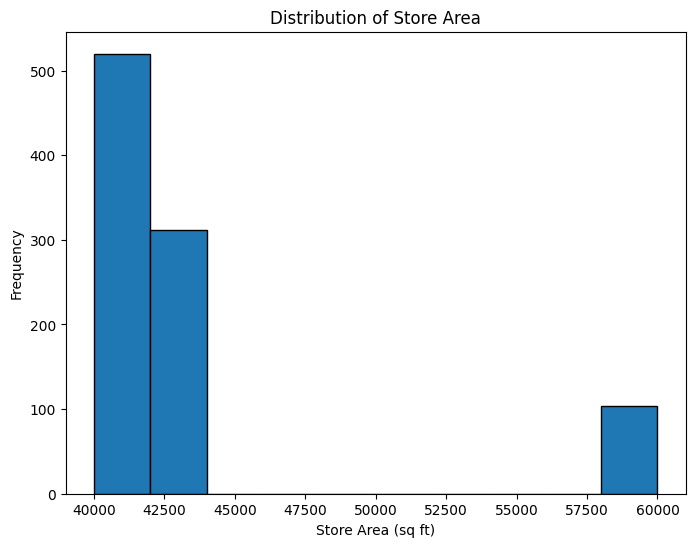

In [9]:
#PROMPT : List the Store Area for each store and create a histogram showing the distribution of the store area.

# CODE:
# List store area for each unique store
store_area_by_store = data[['Store', 'Store Area']].drop_duplicates().sort_values(by='Store')
display(store_area_by_store)

# Assuming `data` is your DataFrame and 'Store Area' is the column name
plt.figure(figsize=(8, 6))
plt.hist(data['Store Area'], bins=10, edgecolor='black')
plt.xlabel('Store Area (sq ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Store Area')
plt.show()

In [10]:
import plotly.express as px

# Create an interactive histogram using Plotly
fig = px.histogram(data, x='Store Area', nbins=10, title='Distribution of Store Area')
fig.update_layout(xaxis_title='Store Area (sq ft)', yaxis_title='Frequency')

# Display the interactive plot
fig.show()


In [11]:
# PROMPT: Create a histogram that compares the weekly sales distributions for stores 1, 3, and 5.

# CODE:

import plotly.express as px

# Filter data for stores 1, 3, and 5
selected_stores_data = data[data['Store'].isin([1, 3, 5])]

# Create an interactive histogram
fig = px.histogram(
    selected_stores_data,
    x='Weekly_Sales',
    color='Store',
    nbins=20,
    title='Weekly Sales Distribution for Stores 1, 3, and 5',
    labels={'Weekly_Sales': 'Weekly Sales ($)', 'Store': 'Store Number'}
)
fig.update_layout(xaxis_title='Weekly Sales ($)', yaxis_title='Frequency')

# Display the interactive plot
fig.show()


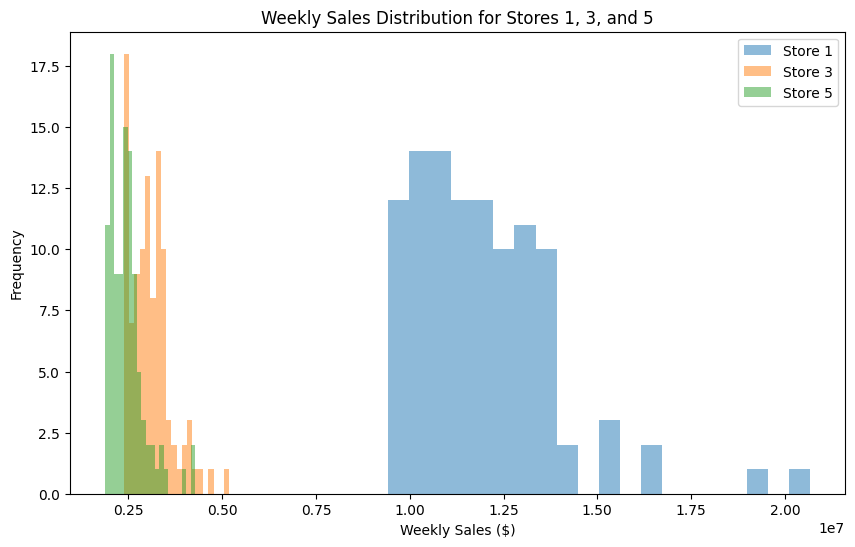

In [12]:
import matplotlib.pyplot as plt

# Filter the data for stores 1, 3, and 5
stores_to_compare = data[data['Store'].isin([1, 3, 5])]

# Plot the histogram for weekly sales distributions for stores 1, 3, and 5
plt.figure(figsize=(10, 6))
for store_id in [1, 3, 5]:
    store_data = stores_to_compare[stores_to_compare['Store'] == store_id]
    plt.hist(store_data['Weekly_Sales'], bins=20, alpha=0.5, label=f'Store {store_id}')

# Adding titles and labels
plt.title('Weekly Sales Distribution for Stores 1, 3, and 5')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


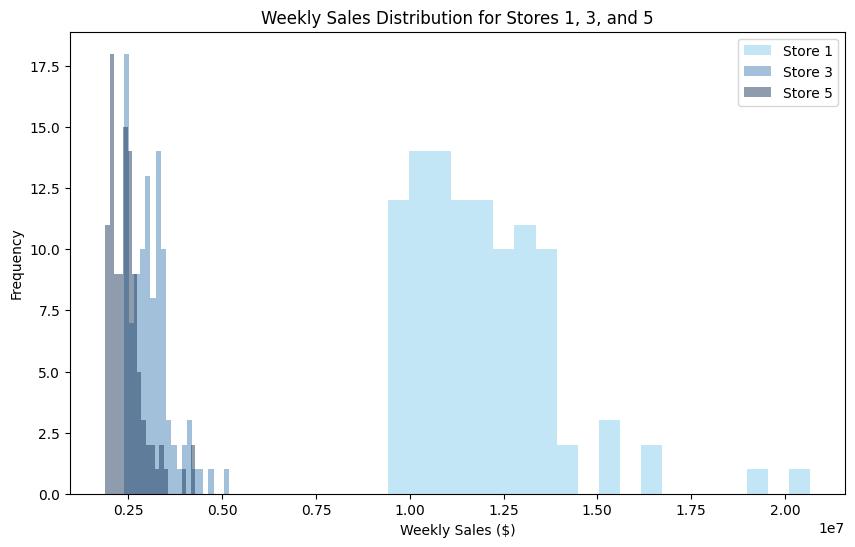

In [13]:
import matplotlib.pyplot as plt

# Define colors for the selected stores (using the "Cool Blues" palette suggested)
colors = ['#89CFF0', '#4682B4', '#1E3A5F']

# Filter the data for stores 1, 3, and 5
stores_to_compare = data[data['Store'].isin([1, 3, 5])]

# Plot the histogram for weekly sales distributions for stores 1, 3, and 5 with specified colors
plt.figure(figsize=(10, 6))
for idx, store_id in enumerate([1, 3, 5]):
    store_data = stores_to_compare[stores_to_compare['Store'] == store_id]
    plt.hist(store_data['Weekly_Sales'], bins=20, alpha=0.5, label=f'Store {store_id}', color=colors[idx])

# Adding titles and labels
plt.title('Weekly Sales Distribution for Stores 1, 3, and 5')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


### Trend Analysis

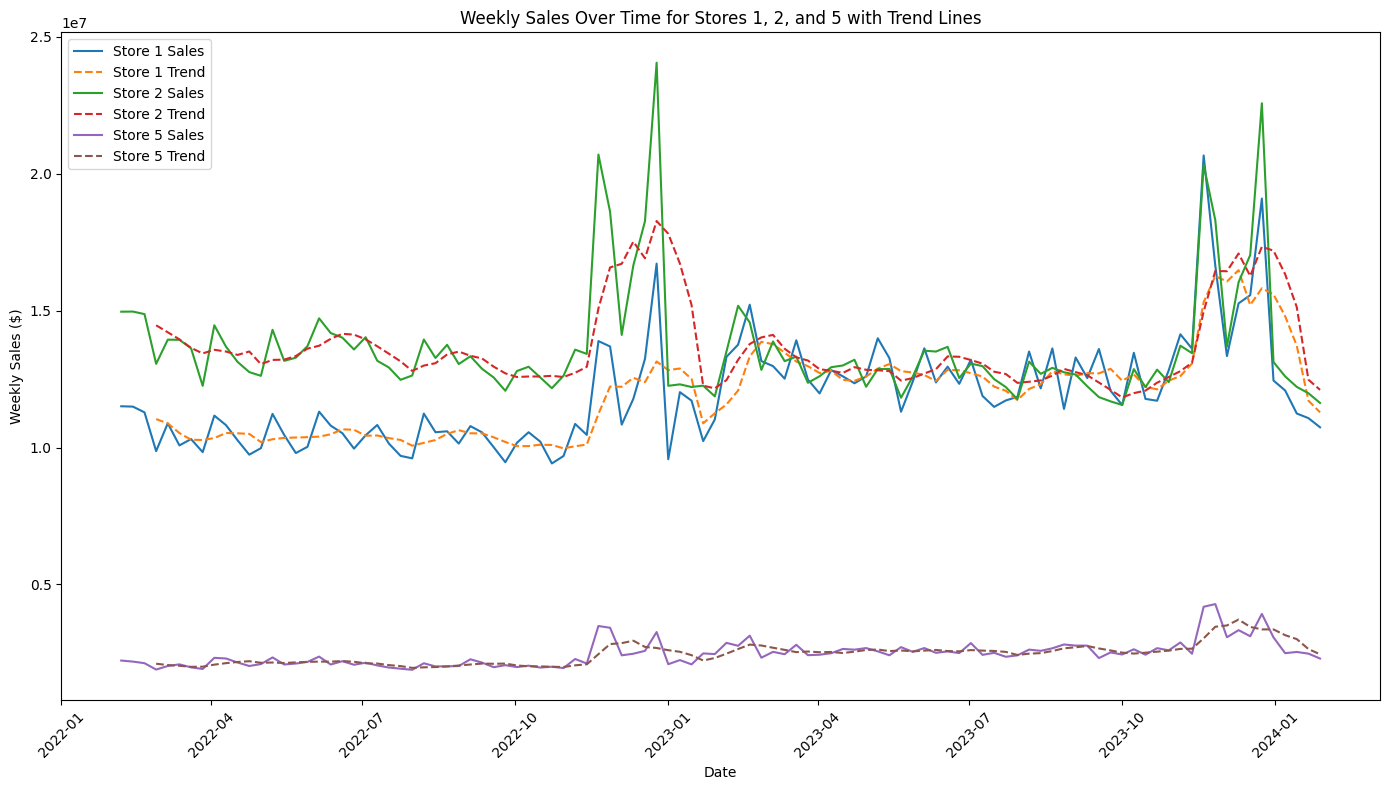

In [14]:
# PROMPT : I'd like to create a line chart to visualize the weekly sales over time for stores 1, 2, and 5 and to include a trend line for each store.

# CODE:

# Reset the font family to the default
plt.rcParams['font.family'] = 'sans-serif'  # or simply delete this line to use the global default


# Set up the plot size and format
plt.figure(figsize=(14, 8))

# Define the stores of interest
stores_of_interest = [1, 2, 5]

# Plot weekly sales for each store with a moving average trend line
for store_id in stores_of_interest:
    store_data = data[data['Store'] == store_id].sort_values(by='Date')

    # Plot the weekly sales data
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store_id} Sales')

    # Calculate and plot a 4-week moving average as a trend line
    store_data['Trend'] = store_data['Weekly_Sales'].rolling(window=4).mean()
    plt.plot(store_data['Date'], store_data['Trend'], linestyle='--', label=f'Store {store_id} Trend')

# Format the plot
plt.title('Weekly Sales Over Time for Stores 1, 2, and 5 with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



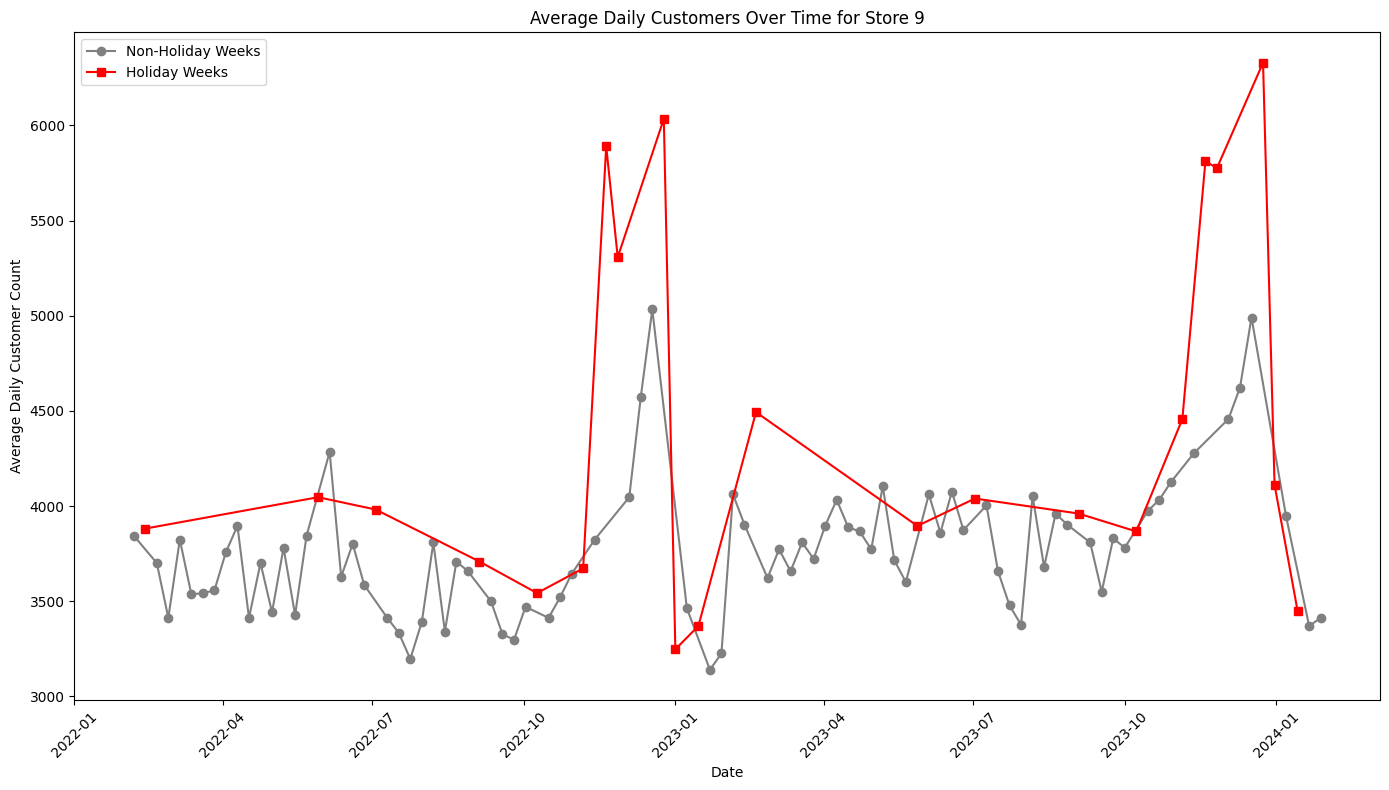

In [15]:
# PROMPT: Create a scatter plot to visualize the average daily customers over time for store 9.
# Use gray cirlces to represent non-holiday weeks and red squares to highlight holiday weeks.

# CODE:

import matplotlib.pyplot as plt

# Filter data for store 9
store_9_data = data[data['Store'] == 9].sort_values(by='Date')

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot non-holiday weeks as gray circles
non_holiday_data = store_9_data[store_9_data['Holiday'] == 'non-holiday']
plt.plot(non_holiday_data['Date'], non_holiday_data['Avg Daily Customer Count'],
         'o-', color='gray', label='Non-Holiday Weeks', markerfacecolor='gray')

# Plot holiday weeks as red squares
holiday_data = store_9_data[store_9_data['Holiday'] != 'non-holiday']
plt.plot(holiday_data['Date'], holiday_data['Avg Daily Customer Count'],
         's-', color='red', label='Holiday Weeks', markerfacecolor='red')

# Format the plot
plt.title('Average Daily Customers Over Time for Store 9')
plt.xlabel('Date')
plt.ylabel('Average Daily Customer Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Deviations, Correlations and Part-to-Whole



#### Deviations


Deviation: Measures the degree of variation from a fixed reference point.

In [16]:
'''
PROMPT: Generate a divergent bar to visualize the deviations in weekly sales of store 1 over time.
Adjust the tick labels to ensure they do not overlap.
'''

# CODE



'\nPROMPT: Generate a divergent bar to visualize the deviations in weekly sales of store 1 over time.\nAdjust the tick labels to ensure they do not overlap.\n'

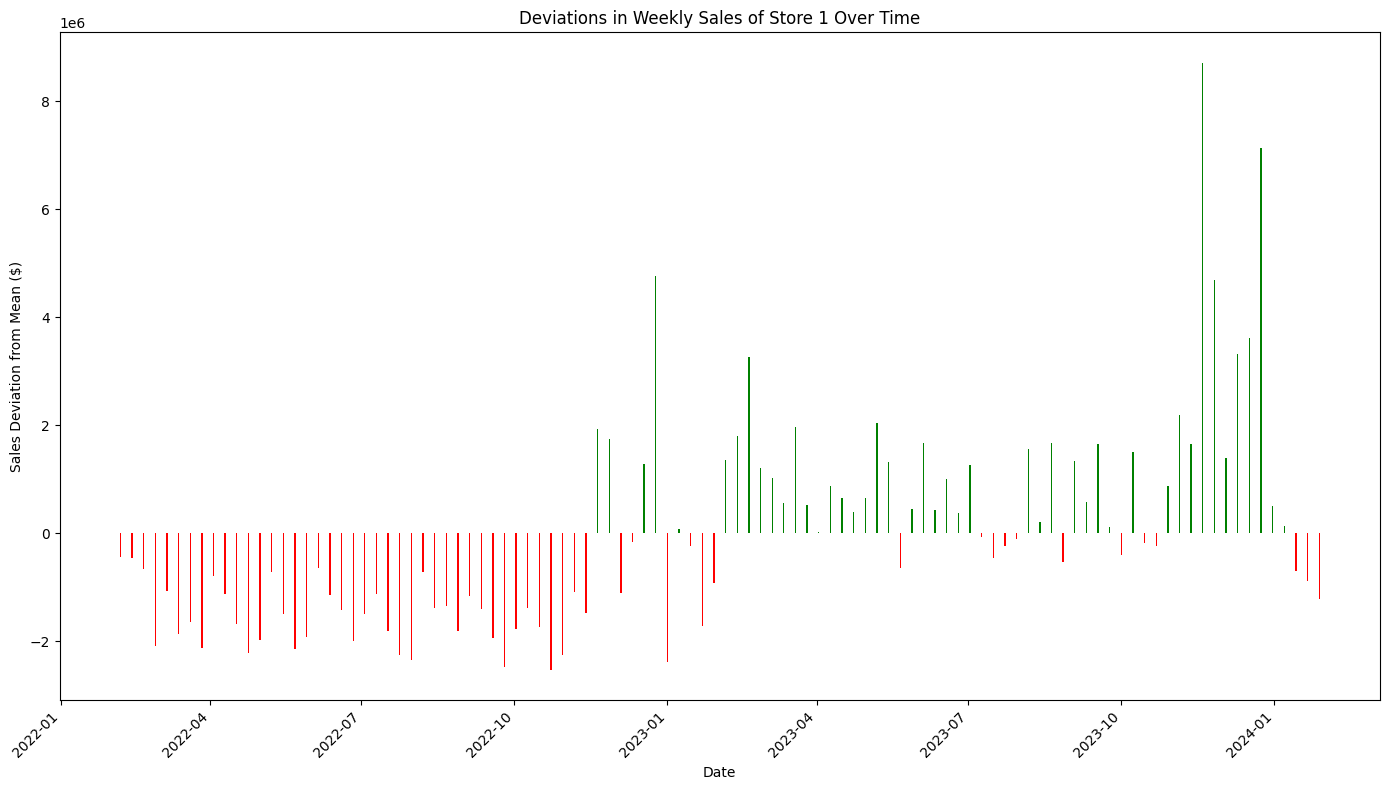

In [17]:
import matplotlib.pyplot as plt

# Filter data for store 1
store_1_data = data[data['Store'] == 1].sort_values(by='Date')

# Calculate the deviation from the mean weekly sales
mean_sales = store_1_data['Weekly_Sales'].mean()
store_1_data['Sales_Deviation'] = store_1_data['Weekly_Sales'] - mean_sales

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot the deviations as a divergent bar chart
plt.bar(store_1_data['Date'], store_1_data['Sales_Deviation'],
        color=store_1_data['Sales_Deviation'].apply(lambda x: 'red' if x < 0 else 'green'))

# Format the plot
plt.title('Deviations in Weekly Sales of Store 1 Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Deviation from Mean ($)')
plt.xticks(rotation=45, ha='right')  # Rotate tick labels to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
import plotly.graph_objects as go

# Filter data for store 1
store_1_data = data[data['Store'] == 1].sort_values(by='Date')

# Calculate the deviation from the mean weekly sales
mean_sales = store_1_data['Weekly_Sales'].mean()
store_1_data['Sales_Deviation'] = store_1_data['Weekly_Sales'] - mean_sales

# Define colors based on deviation
colors = ['green' if deviation >= 0 else 'red' for deviation in store_1_data['Sales_Deviation']]

# Create an interactive vertical bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=store_1_data['Date'],
            y=store_1_data['Sales_Deviation'],
            marker_color=colors,
            text=store_1_data['Sales_Deviation'],
            hoverinfo='x+y'
        )
    ]
)

# Customize layout
fig.update_layout(
    title='Deviations in Weekly Sales of Store 1 Over Time',
    xaxis_title='Date',
    yaxis_title='Sales Deviation from Mean ($)',
    xaxis_tickangle=-45  # Adjust tick labels to avoid overlap
)

# Display the interactive plot
fig.show()


#### Correlations




"Correlation does not imply causation"

The Golden Arches Theory of Conflict Prevention

"No two countries that both have McDonald's restaurants
have ever gone to war against each other."
-Thomas Friedman 1996

Correlation Coefficients (-1 to 1)
* 1 - Indicates a perfect positive correlation
* 0 - indicates no correlation
* -1  - indicates a perfect negative correlation

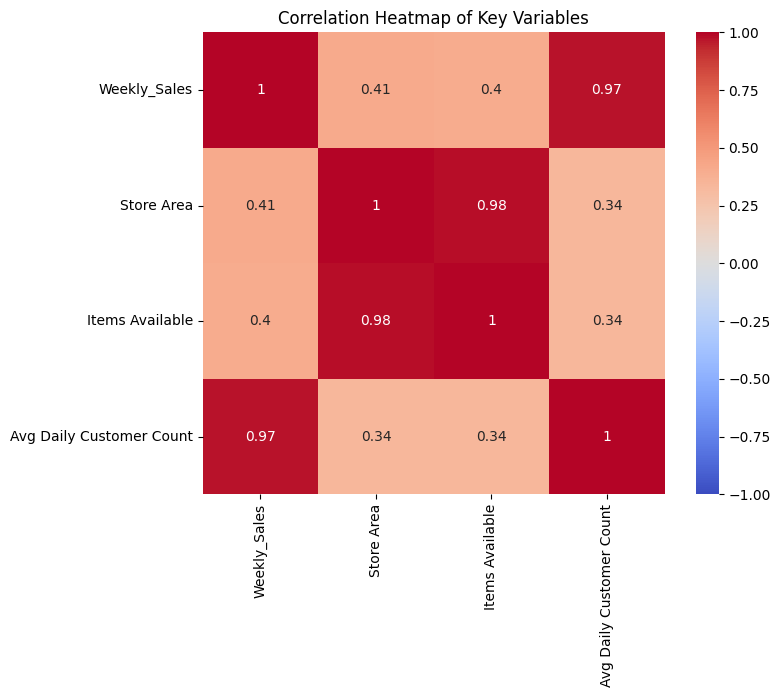

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation analysis
correlation_data = data[['Weekly_Sales', 'Store Area', 'Items Available', 'Avg Daily Customer Count']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

# Add titles and labels
plt.title('Correlation Heatmap of Key Variables')
plt.show()


In [20]:
import plotly.graph_objects as go

# Calculate the correlation matrix for the selected columns
correlation_matrix = data[['Weekly_Sales', 'Store Area', 'Items Available', 'Avg Daily Customer Count']].corr()

# Create an interactive heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',  # Diverging color scale
    zmin=-1, zmax=1,
    colorbar_title="Correlation"
))

# Update layout for readability
fig.update_layout(
    title='Correlation Heatmap of Key Variables',
    xaxis_nticks=len(correlation_matrix.columns),
    yaxis_nticks=len(correlation_matrix.columns),
)

# Display the interactive heatmap
fig.show()


#### Part-to-Whole

Proportions and Distributions
* Which stores contribute the most to the total sales?
* How do sales during holiday weeks compared to non-holiday weeks?
* Does the business rely heavily on holiday periods for its revenue?

In [22]:
# Display the first five rows of the dataset
data.head()

,Store,Date,Holiday,Weekly_Sales,Store Area,Items Available,Avg Daily Customer Count,Location
0,1,2022-02-06,non-holiday,11505836.30,60000,55175,11027,"New York, NY"
1,1,2022-02-13,Presidents' Day,11493702.08,60000,58394,11648,"New York, NY"
2,1,2022-02-20,non-holiday,11283777.19,60000,57172,11196,"New York, NY"
3,1,2022-02-27,non-holiday,9868093.13,60000,56427,9657,"New York, NY"
4,1,2022-03-06,non-holiday,10883646.76,60000,53954,10197,"New York, NY"


In [24]:
# Aggregate the dataset by the 'Holiday' column, calculating the sum of 'Weekly Sales' for each unique holiday
holiday_sales_summary = data.groupby('Holiday')['Weekly_Sales'].sum().reset_index()

# Display the results
display(holiday_sales_summary)


,Holiday,Weekly_Sales
0,Christmas Day,2.410414e+08
1,Columbus Day,1.428020e+08
2,Cyber Monday,2.034032e+08
3,Independence Day,1.456484e+08
4,Labor Day,1.417951e+08
5,Martin Luther King Jr. Day,1.387428e+08
6,Memorial Day,1.383979e+08
7,New Year's Day,1.398007e+08
8,Presidents' Day,1.593816e+08
9,"Thanksgiving Day, Black Friday",2.237928e+08


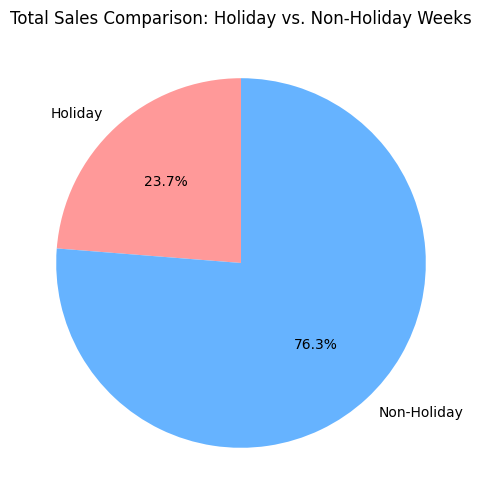

In [25]:
import matplotlib.pyplot as plt

# Aggregate sales by holiday vs. non-holiday weeks
holiday_sales_summary = data.groupby('Holiday')['Weekly_Sales'].sum().reset_index()
holiday_sales_summary['Category'] = holiday_sales_summary['Holiday'].apply(
    lambda x: 'Holiday' if x != 'non-holiday' else 'Non-Holiday'
)
total_sales_comparison = holiday_sales_summary.groupby('Category')['Weekly_Sales'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    total_sales_comparison,
    labels=total_sales_comparison.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF9999', '#66B3FF']
)
plt.title('Total Sales Comparison: Holiday vs. Non-Holiday Weeks')
plt.show()


In [26]:
import plotly.express as px

# Aggregate sales by holiday vs. non-holiday weeks
holiday_sales_summary = data.groupby('Holiday')['Weekly_Sales'].sum().reset_index()
holiday_sales_summary['Category'] = holiday_sales_summary['Holiday'].apply(
    lambda x: 'Holiday' if x != 'non-holiday' else 'Non-Holiday'
)
total_sales_comparison = holiday_sales_summary.groupby('Category')['Weekly_Sales'].sum().reset_index()

# Create an interactive pie chart using Plotly
fig = px.pie(
    total_sales_comparison,
    values='Weekly_Sales',
    names='Category',
    title='Total Sales Comparison: Holiday vs. Non-Holiday Weeks',
    color_discrete_sequence=['#FF9999', '#66B3FF']
)

# Display the interactive pie chart
fig.show()


In [27]:
# Aggregate the dataset by each store, summing the 'Weekly Sales' for each store
store_sales_summary = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Display the results
display(store_sales_summary)


,Store,Weekly_Sales
0,1,1.242851e+09
1,2,1.419619e+09
2,3,3.207485e+08
3,4,1.695551e+09
4,5,2.555692e+08
5,6,1.153758e+09
6,7,4.161973e+08
7,8,7.317201e+08
8,9,4.383435e+08


In [28]:
import plotly.express as px

# Aggregate the dataset by each store, summing the 'Weekly Sales' for each store
store_sales_summary = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Define a color palette for differentiation
color_palette = px.colors.qualitative.Plotly  # A built-in color palette with distinct colors

# Create an interactive donut chart
fig = px.pie(
    store_sales_summary,
    values='Weekly_Sales',
    names='Store',
    title='Proportion of Total Sales by Store',
    hole=0.4,  # Converts pie chart to donut chart
    color_discrete_sequence=color_palette
)

# Display the interactive donut chart
fig.show()


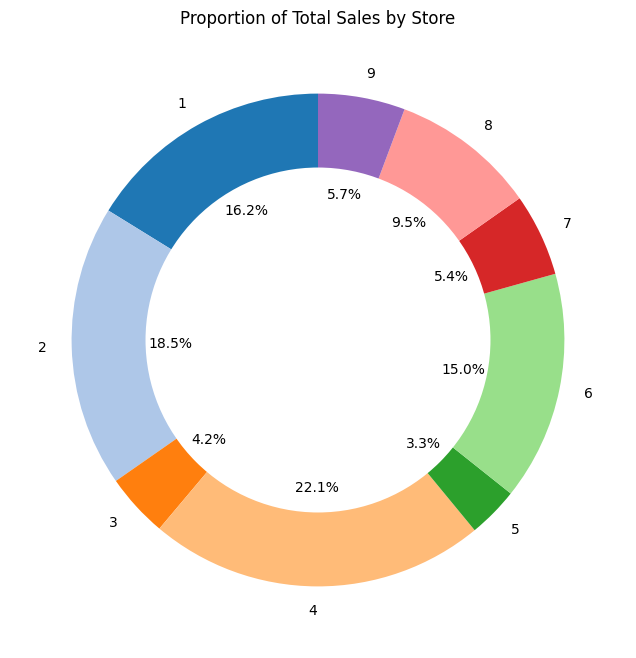

In [29]:
import matplotlib.pyplot as plt

# Aggregate the dataset by each store, summing the 'Weekly Sales' for each store
store_sales_summary = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Define a color palette for each store
colors = plt.cm.tab20.colors  # A color map with distinct colors

# Plot a basic donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    store_sales_summary['Weekly_Sales'],
    labels=store_sales_summary['Store'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
# Draw a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add title and display the plot
plt.title('Proportion of Total Sales by Store')
plt.show()


In [31]:
from math import pi
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd

# Ensure output displays in Jupyter Notebook
output_notebook()

# Prepare the data by aggregating weekly sales for each store
store_sales_summary = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales_summary['angle'] = store_sales_summary['Weekly_Sales'] / store_sales_summary['Weekly_Sales'].sum() * 2 * pi
store_sales_summary['color'] = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#c299ff', '#f0c2c2']

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(store_sales_summary)

# Set up the donut chart with Bokeh's figure object
# Changed plot_height and plot_width to height and width respectively
p = figure(height=400, width=400, title="Proportion of Total Sales by Store",
           toolbar_location=None, tools="hover", tooltips="@Store: @Weekly_Sales{($ 0.00 a)}", x_range=(-1, 1), y_range=(-1, 1))

# Add circular wedges to create a donut chart
p.annular_wedge(x=0, y=0, inner_radius=0.3, outer_radius=0.7,
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
                line_color="white", fill_color='color', source=source)

# Show the plot
show(p)
